# Probability distribution


All the distributions available in scipy can be found on the docs here: http://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats


Some examples taken from: https://gist.github.com/mattions/6113437



## Discrete Distributions

* bernoulli
* binomial
* poisson
* ...



In [72]:
%pylab inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats


from scipy.stats import bernoulli, poisson, binom, geom

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


### Bernoulli distribution


Given a certain probability $p$, the Bernoulli distribution takes value $k=1$, meanwhile 
it takes $k=0$ in all the other cases $1-p$. The outcome of one experiment(single coin toss) can be described by a Bernoulli distribution. What is the probability of head?

In other words:

$$
f(k;p) = \begin{cases}
    p & \text{if } k=1 \\\\ 
    1-p & \text{if } k=0
\end{cases}
$$

In [73]:
p = 0.6
bernoulli.rvs(p, size=10)

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0])

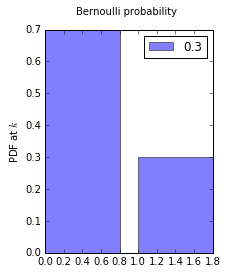

In [74]:
a = np.arange(2)

p = 0.3

plt.figure(figsize=(3,4))
plt.bar(a, bernoulli.pmf(a, p), label=p, color=["blue"], alpha=0.5)
ax.xaxis.set_ticks(a)

plt.legend(loc=0)
plt.ylabel("PDF at $k$")
    

plt.suptitle("Bernoulli probability")

### Binomial distribution

If one experiment (e.g. coin toss) consists of several trials then the outcome can be described with a binomial distribution. What is the probability to observe k heads in n trails?

Binomial distribution which is defined as:
$$f(k;n,p) = Pr(X = k) = {n \choose k} p^k (1-p)^{(n-k)}$$

where 

$${n \choose k} = \frac{n!}{k!(n-k)!}$$

with $k={1, 2, 3, \ldots}$

C:\Users\wagnerca\AppData\Local\Continuum\Miniconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


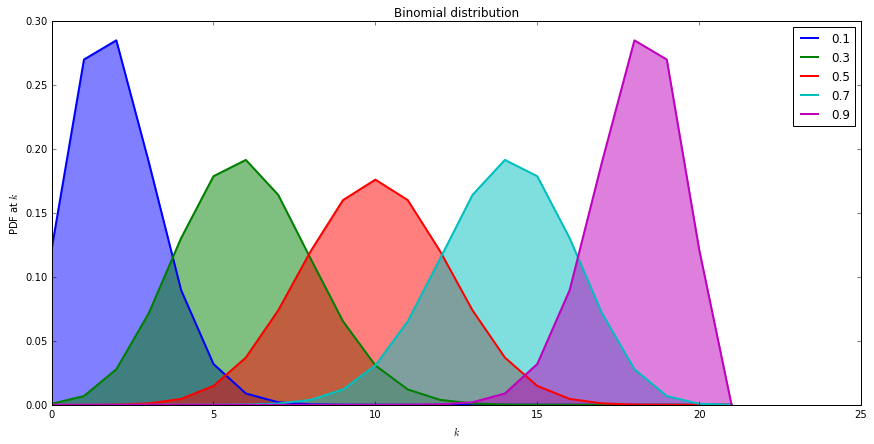

In [75]:
plt.figure(figsize=(12,6))

colors = matplotlib.rcParams['axes.color_cycle']
k = np.arange(0, 22)
for p, color in zip([0.1, 0.3, 0.5, 0.7, 0.9], colors):
    # sample 20 points from a binomial distribution; repeat coin toss 20 times
    rv = binom(20, p)
    plt.plot(k, rv.pmf(k), lw=2, color=color, label=p)
    plt.fill_between(k, rv.pmf(k), color=color, alpha=0.5)
plt.legend()
plt.title("Binomial distribution")
plt.tight_layout()
plt.ylabel("PDF at $k$")
plt.xlabel("$k$")

### Poisson Distribution


The Poisson Distribution can be used to model count data (i.e., how often does an event occur in an interval).
For example: How many goals are scored during a match? How many accidence happen per day? How many visitors does a website atrract per day?

* Events must occur independently. 
* Probability of an event in an interval is proportional to the length of the interval.
* The rate at which events occur is constant. The rate cannot be higher in some intervals and lower in other intervals.



It is defined for all the integer positive number as follows:

$$P(Z=k)=\frac{λ^ke^{−λ}}{k!}, k=0,1,2, \ldots$$



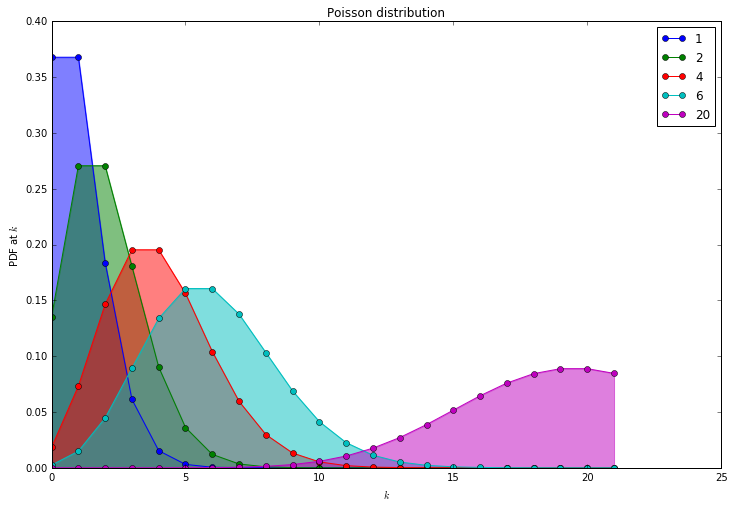

In [76]:

plt.figure(figsize=(12,8))

# lambda defined mean and variance of distribution
for i, lambda_ in enumerate([1, 2, 4, 6, 20]):
    plt.plot(k, poisson.pmf(k, lambda_), '-o', label=lambda_, color=colors[i])
    plt.fill_between(k, poisson.pmf(k, lambda_), color=colors[i], alpha=0.5)
    plt.legend()

plt.title("Poisson distribution")
plt.ylabel("PDF at $k$")
plt.xlabel("$k$")

### Exercise:
Describe at least one other descrete probability distribution. Plot it. Give an example for observations that follow this distribution. Do not use the uniform distribution.

In [77]:
# TODO students!


## Continous Probability Distribution


They are defined for any value of a positive $x$. 

* gauss
* chi2
* beta	
* exponential
* ...


### Normal Distribution 

Represent real-valued random variables whose distributions are not known.
The normal distribution is useful because of the central limit theorem. In its most general form, under some conditions (which include finite variance), it states that averages of random variables independently drawn from independent distributions converge in distribution to the normal distribution.

Probability density of a normal distribution:

$P(x) = \frac{1}{{\sigma \sqrt {2\pi } }}e^{{{ - \left( {x - \mu } \right)^2 } \mathord{\left/ {\vphantom {{ - \left( {x - \mu } \right)^2 } {2\sigma ^2 }}} \right. \kern-\nulldelimiterspace} {2\sigma ^2 }}}$





-2.32634787404
2.32634787404


C:\Users\wagnerca\AppData\Local\Continuum\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


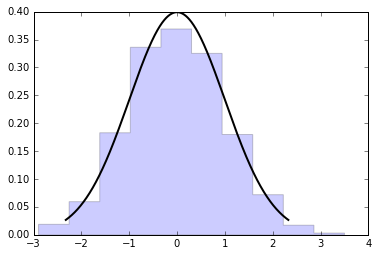

mean:4.0, var:1.0, skew:0.0, kurtusis:0.0
*) Skewness is a measure of the lack of symmetry. A normal distribution which is symmetric has a skewness=0.
*) Negative values for the skewness indicate data that are skewed left. Positive values indicate right skew. 
*) Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.
*) Normal distribution has a kurtosis=0. A flatter distribution has a negative kurtosis. A more peaked distribution has a positive kurtosis.


In [78]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)


# sample 100 points from a standard normal 
points = norm.rvs(loc = 0, scale = 1, size=1000)

ax.hist(points, normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)

# ppf - Percent point function (inverse of cdf — percentiles).
print(norm.ppf(0.01))
print(norm.ppf(0.99))
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 1000)
ax.plot(x, norm.pdf(x), 'k-', lw=2, label='frozen pdf')

plt.show()

mean, var, skew, kurt = norm.stats(df, moments='mvsk')
print("mean:%s, var:%s, skew:%s, kurtusis:%s" %(mean, var, skew, kurt))
print("*) Skewness is a measure of the lack of symmetry. A normal distribution which is symmetric has a skewness=0.")
print("*) Negative values for the skewness indicate data that are skewed left. Positive values indicate right skew. ")
print("*) Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.")
print("*) Normal distribution has a kurtosis=0. A flatter distribution has a negative kurtosis. A more peaked distribution has a positive kurtosis.")


#### What is the probability of observing value x?

In [79]:
# mean = 0
# std = 1
# what is the probability of x = 0
print(norm(0, 1).pdf(0))

# what is the probability of x = 3
print(norm(0, 1).pdf(3))

# what is the probability of x = -3
print(norm(0, 1).pdf(-3))


0.398942280401
0.00443184841194
0.00443184841194


#### Cumulative Distribution
Cumulative distribution function (CDF) of a discrete random variable X is the probability that X will take a value less than or equal to x.
In the case of a continuous distribution, it gives the area under the probability density function from minus infinity to x. 


Percent point function (PPF) or inverse cumulative function: just switch x and y axis in CDF plot.
Gives the value of the x for which the cumulative probability has a certain value. 

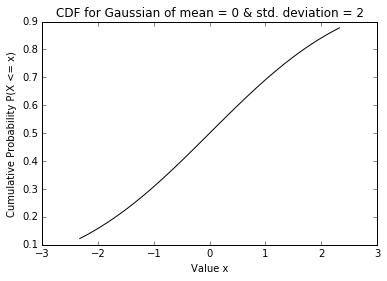

In [80]:
mean = 0
std = 2
y = norm.cdf(x, loc=mean, scale=std)

plt.plot(x,y, color="black")
plt.xlabel("Value x")
plt.ylabel("Cumulative Probability P(X <= x)")
plt.title("CDF for Gaussian of mean = {0} & std. deviation = {1}".format(mean, std))
plt.draw()

### Chi2

Distribution of a sum of the squares of k independent standard normal random variables


C:\Users\wagnerca\AppData\Local\Continuum\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


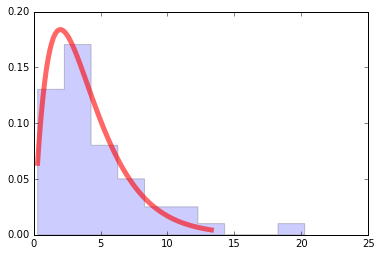

mean:4.0, var:8.0, skew:1.4142135623730951, kurtusis:3.0
Skewness is a measure of the lack of symmetry. A normal distribution which is symmetric has a skewness=0.
Negative values for the skewness indicate data that are skewed left. Positive values indicate right skew. 
Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.
Normal distribution has a kurtosis=0. A flatter distribution has a negative kurtosis. A more peaked distribution has a positive kurtosis.


In [81]:
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)


# degree of freedom
df = 4

# sample 100 points from a chi squared distributed random variable 
points = chi2.rvs(df, size=100)

ax.hist(points, normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)

x = np.linspace(chi2.ppf(0.01, df), chi2.ppf(0.99, df), 100)
ax.plot(x, chi2.pdf(x, df), 'r-', lw=5, alpha=0.6, label='chi2 pdf')

plt.show()

mean, var, skew, kurt = chi2.stats(df, moments='mvsk')
print("mean:%s, var:%s, skew:%s, kurtusis:%s" %(mean, var, skew, kurt))
print("Skewness is a measure of the lack of symmetry. A normal distribution which is symmetric has a skewness=0.")
print("Negative values for the skewness indicate data that are skewed left. Positive values indicate right skew. ")
print("Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.")
print("Normal distribution has a kurtosis=0. A flatter distribution has a negative kurtosis. A more peaked distribution has a positive kurtosis.")


### Beta distribution


The beta distribution can be understood as representing a distribution of probabilities- that is, it represents all the possible values of a probability when we don't know what that probability is.
The Beta distribution is defined for a variable ranging between 0 and 1. 

Example: penalty shootout success of a single football player in a certain season = number of goals during 	penalty shootout / total number of penalty shootouts. The distribution of success probabilities of several seasons follows a beta distribution. Alpha and beta are pseudo counts (i.e. how often have we observed success and how often failure).


The pdf is defined as:
$$
beta.pdf(x, \alpha, \beta) = \frac{1}{B(\alpha, \beta)}x^{\alpha-1}(1 - x)^{\beta-1}, \; with \;  0≤x≤1, \alpha>0, \beta>0
$$

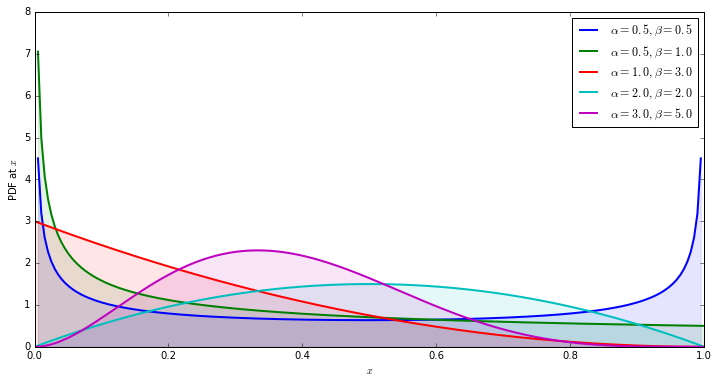

In [82]:
beta = scipy.stats.beta
x = np.linspace(0,1, num=200)


fig = plt.figure(figsize=(12,6))
for a, b, c in zip([0.5, 0.5, 1, 2, 3], [0.5, 1, 3, 2, 5], colors):
    plt.plot(x, beta.pdf(x, a, b), lw=2, 
             c=c, label = r"$\alpha = {0:.1f}, \beta={1:.1f}$".format(a, b))
    plt.fill_between(x, beta.pdf(x, a, b), color=c, alpha = .1)
    
    
plt.legend(loc=0)
plt.ylabel("PDF at $x$")
plt.xlabel("$x$")


Exponential
-----------

The Exponantial probability function is

$$ f_X(x|λ) = λ e^{−λx} , \, x≥0$$

Therefore, the random variable X has an exponential distribution with parameter λ, we say X is exponential and write

$$ X∼Exp(λ) $$

Given a specific λ, the expected value of an exponential random variable is equal to the inverse of λ, that is:

$$ E[X|λ]= \frac{1}{λ} $$

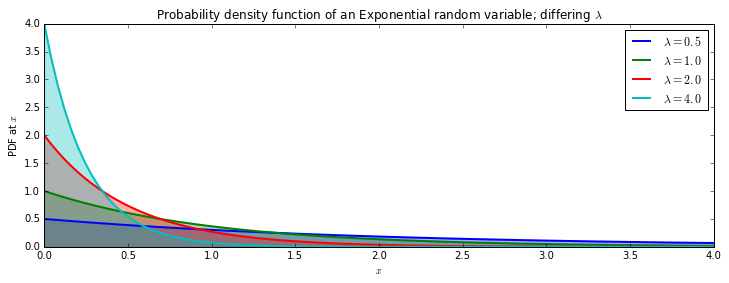

In [83]:
x = np.linspace(0,4, 100)
expo = scipy.stats.expon
lambda_ = [0.5, 1, 2, 4]
plt.figure(figsize=(12,4))
for l,c in zip(lambda_,colors):
    plt.plot(x, expo.pdf(x, scale=1./l), lw=2, 
                color=c, label = "$\lambda = %.1f$"%l)
    plt.fill_between(x, expo.pdf(x, scale=1./l), color=c, alpha = .33)
    
plt.legend()
plt.ylabel("PDF at $x$")
plt.xlabel("$x$")
plt.title("Probability density function of an Exponential random variable;\
 differing $\lambda$");

### Exercise:
Describe a powerlaw and lognormal distribution. Plot it. Give an example for observations that follow this distribution.